## Lecture 10, In-Class Illustration: Limits and l'Hopital's Rule

When analysing physical problems, we often end up considering ratios.  One common example comes from Newton's second law: the acceleration of a body is equal to force divided by mass ($a=F/m$).  But these ratios, along with more complex physical scenarios, can lead us into mathematical conundrums: What happens when if the mass (or any other denominator of a ratio) goes to zero?  Does the acceleration become infinite?  Or does the acceleration still depend on the force applied?  What if both the force and the mass go to zero?

In this exercise, we'll go through a (somewhat artificial) example to work out how to predict behaviours at times and x-values when our equations give nonsensical answers at first glance.

First, run the code in the cell below to import some useful functions.

In [13]:
# Place your cursor here, click, and press run.
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from numpy import arange,sin,cos,divide,power

print('You have imported some useful functions')

You have imported some useful functions


Now we can set up our problem.  Let's imagine that we're pushing a bucket of water across the floor with a force that decreases with time, as
$$F=\sin(-t)$$.

We start pushing at time $t=-1$ and continue pushing as time tends toward 0.

Run the code below to plot the force as a function of time.

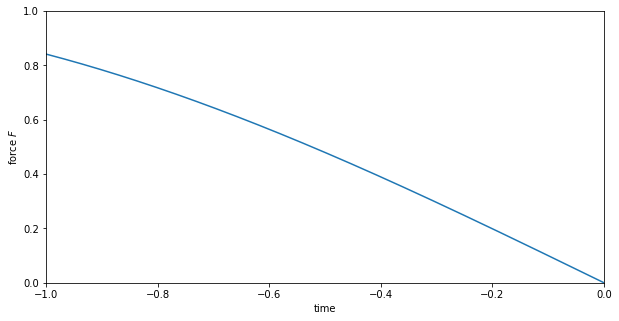

In [10]:
# first create a list of times
t=arange(-1,0,0.001)

# and compute the force
F=-sin(t)

# and plot
plt.figure(figsize=(10,5))
plot(t,F);
plt.xlabel('time');
plt.ylabel('force $F$');
plt.xlim([-1,0]);
plt.ylim([0,1]);

Let's imagine that our bucket has a hole in it.  Water is leaking out so that the mass of the bucket is
$$m=-t$$. The mass thus tends to zero at time $t=0$.

Run the cell below to plot the mass through time.

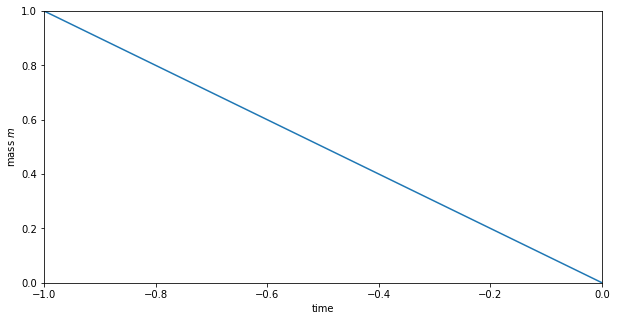

In [9]:
# and compute the mass through time
m=-1*t

# and plot
plt.figure(figsize=(10,5))
plot(t,m);
plt.xlabel('time');
plt.ylabel('mass $m$');
plt.xlim([-1,0]);
plt.ylim([0,1]);

We want to know how the bucket accelerates.  Specifically, we are interested in the acceleration at time $t=0$.
Acceleration is given by 

$$a=\frac{F}{m},$$

and if we input our functions for $F$ and $m$, we get

$$a=\frac{F}{m} = \frac{-\sin{t}}{-t} = \frac{\sin{t}}{t}.$$

Q1: What do you get if you try to directly compute $a(t=0)$?

<br><br>
<!--You get $0/0$, which is undefined.!-->

The direct computation $t=0$ didn't go well.  But we can compute $\sin(t)/t$ for values of $t$ that are close to zero.  

Q2: Calculate $a(t)$ at times $t=0.2$, $0.1$, $0.05$, $0.01$, and $0.001$.


<br><br>

In [5]:
print('t(t=0) is ')
print(sin(0.)/0)

print()
print('nan means \'not a number\'')

t(t=0) is 
nan

nan means 'not a number'


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [6]:
print('a(t=0.2) is ')
print(sin(0.2)/0.2)

print('a(t=0.1) is ')
print(sin(0.1)/0.1)

print('a(t=0.05) is ')
print(sin(0.05)/0.05)

print('a(t=0.01) is ')
print(sin(0.01)/0.01)

print('a(t=0.001) is ')
print(sin(0.001)/0.001)

a(t=0.2) is 
0.9933466539753061
a(t=0.1) is 
0.9983341664682815
a(t=0.05) is 
0.9995833854135666
a(t=0.01) is 
0.9999833334166665
a(t=0.001) is 
0.9999998333333416


We can thus see that as time tends to zero, $a=\sin(t)/t$ tends to 1.  

$$\lim_{t\rightarrow 0} = 1$$

For completeness, let's plot $a$ as a function of time.  Run the cell below.

The acceleration is undefined at time 0, but it clearly tends to 1 as time approaches zero.


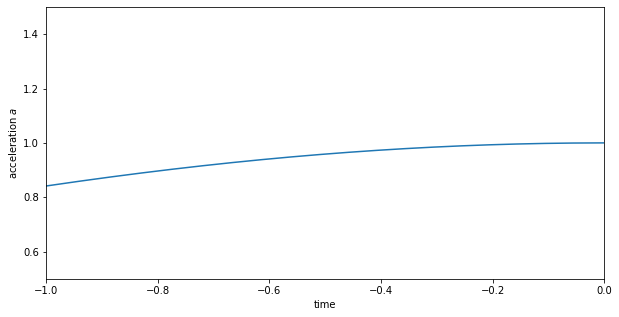

In [11]:
# and compute the acceleration through time
a=divide(sin(t),t)

# and plot
plt.figure(figsize=(10,5))
plot(t,a);
plt.xlabel('time');
plt.ylabel('acceleration $a$');
plt.xlim([-1,0]);
plt.ylim([0.5,1.5]);

print('The acceleration is undefined at time 0, but it clearly tends to 1 as time approaches zero.')

In many instances, however, we will not want to numerically compute $a$ for ever-smaller values of $t$.  Instead, then, let's look at Maclaurin series approximations of $F$ and $m$.

For a general function $f$, we may write 

$$f(t) = f(0) + f'(0) t + \frac{1}{2}f''(0)t^2 + \frac{1}{3!}f^3(t) t^3 + ...$$


<br>
For $F=-\sin(t)$, 
$$f(0)=0$$
$$f'(0)=-\cos(0)=1$$
$$f''(0)=\sin(0)=0$$
$$f^3(0)=\cos(0)=-1$$
$$f^4(0)=-\sin(0)=0$$
$$f^5(0)=-\cos(0)=1$$

<br>
Inserting these derivatives into the Maclaurin expansion, 
the fifth-order approximation of $F$ is 

$$F(t) \approx -\sin(0) - \cos(0) t +\frac{\sin(0)}{2} t^2 +\frac{\cos(0)}{3!} t^3 +
\frac{\sin(0)}{4!}t^4 - \frac{\cos(0)}{5!}t^5$$

$$F(t) \approx -t + \frac{t^3}{3!} - \frac{t^5}{5!} $$

<br><br>
Let's go ahead and plot several versions of this fifth-order approximation: a version with just the first term, a version with the first two terms, and a version with all three terms.

Using multiple terms is important at early times, but the first (leading) term is sufficient as the time approaches zero.


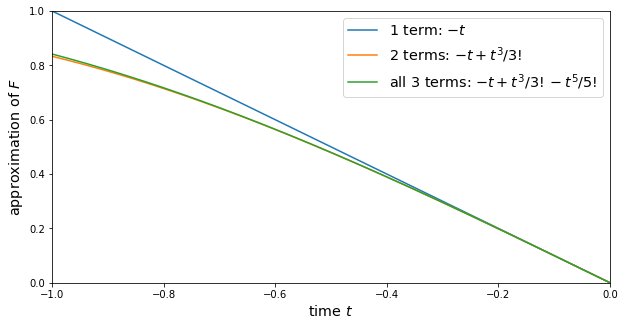

In [27]:
# compute the approximation with just the first term
F_1_term=-t

# compute the approximation with the first two terms
F_2_terms=-t+power(t,3)/(3*2)

# compute the approximation with all three terms
F_3_terms=-t+power(t,3)/(3*2)-power(t,5)/(5*4*3*2*1)


# and plot all three
plt.figure(figsize=(10,5))
plot(t,F_1_term,label='1 term: $-t$');
plot(t,F_2_terms,label='2 terms: $-t+t^3/3!$');
plot(t,F_3_terms,label='all 3 terms: $-t+t^3/3!-t^5/5!$');
plt.xlabel('time $t$',fontsize='x-large');
plt.ylabel('approximation of $F$',fontsize='x-large')
plt.xlim([-1,0]);
plt.ylim([0,1]);
plt.legend(fontsize='x-large');

print('Using multiple terms is important at early times, but the first (leading) term is sufficient as the time approaches zero.')

What we see here is that when $|t|$ is large, all three terms are useful.  The second and third terms are smaller than the first, but all terms are significant. 

As $t\rightarrow 0$, all three terms decrease in magnitude, but the second and third terms decrease faster than the first, so by the time we approach $t=0$, the second and third terms are \textit{much} smaller than the first, and we can accurately approximate 

$$F(t) =-\sin(t) \approx -t.$$

<br>
Terminology note: To describe this approximation, we may say that $F(t)$, or $-\sin(t)$ "behaves like" $-t$ for values of $t$ near zero.

<br><br>

Now that we know how $F(t)$ behaves near $t=0$, we can compute the acceleration as $t\rightarrow 0$:

$$\lim_{t\rightarrow 0}a(t) = \lim_{t\rightarrow 0}\frac{F(t)}{m(t)} = \lim_{t\rightarrow 0}\frac{-\sin(t)}{-t} 
\approx \lim_{t\rightarrow 0}\frac{-t}{-t} = 1$$

Where here we have taken advantage of the fact that $-\sin(t)$ is well approximated by $-t$ at times $t$ near zero.
We find that the acceleration, or $-\sin(t)/t$, tends to 1 as $t\rightarrow 0$, consistent with our numerical calculations earlier.